In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_params # вывод результатов тестирования
from statsmodels.iolib.summary2 import summary_col # вывод результатов тестирования
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import io
import scipy.stats as stats

# 1 sleep equation #1

## 1.1 VIFs

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df['totwrk2_10000'] = df['totwrk']**2/10000

In [25]:
model = smf.ols(data = df , formula = 'sleep~I(totwrk/100)+totwrk2_10000 +  age + smsa + male + south').fit()
#основная
model_1 = smf.ols(data = df , formula = 'I(totwrk/100)~totwrk2_10000 +  age + smsa + male + south').fit()
model_2 = smf.ols(data = df , formula = 'totwrk2_10000~ I(totwrk/100)+  age + smsa + male + south').fit()
model_3 = smf.ols(data = df , formula = 'male~I(totwrk/100)+ I(totwrk/100)+  age + smsa  + south').fit()
model_1.params.round(3)

Intercept        9.003
totwrk2_10000    0.021
age             -0.008
smsa             0.357
male             1.071
south            0.989
dtype: float64

In [26]:
VIF_totwrk100 = 1/(1 - model_1.rsquared)
VIF_totwrk100.round(2)

8.48

In [5]:
VIF_totwrk2_10000 = 1/(1 - model_2.rsquared)
VIF_totwrk2_10000.round(2)

8.28

In [6]:
VIF_male = 1/(1 - model_3.rsquared)
VIF_male.round(2)

1.17

## 1.2 Последствия

In [27]:
models = smf.ols(data = df, formula = 'sleep~I(totwrk/100)+totwrk2_10000 +  age + smsa + male').fit()
models.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sleep   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     20.57
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           3.42e-19
Time:                        18:34:30   Log-Likelihood:                -5257.2
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     700   BIC:                         1.055e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3428.8048     76.655     44.730      0.000    3278.303    3579.306
I(totwrk / 100)    -8.1953      4.789     -1.711      0.088     -17.599       1.208
totwrk2_10000      -0.2142      0.111     -1.930      0.054      -0.432       0.004
age                 2.8167      1.387      2.031      0.043       0.094       5.540
smsa              -78.0495     32.072     -2.434      0.015    -141.019     -15.080
male               86.6388     34.200      2.533      0.012      19.492     153.786
==============================================================================
Omnibus:                       63.342   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.146
Skew:                          -0.442   Prob(JB):                     3.41e-39
Kurtosis:                       5.289   Cond. No.                     3.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
models.summary(alpha=0.05).tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3428.8048,76.655,44.730,0.000,3278.303,3579.306
I(totwrk / 100),-8.1953,4.789,-1.711,0.088,-17.599,1.208
totwrk2_10000,-0.2142,0.111,-1.930,0.054,-0.432,0.004
age,2.8167,1.387,2.031,0.043,0.094,5.540
smsa,-78.0495,32.072,-2.434,0.015,-141.019,-15.080
male,86.6388,34.200,2.533,0.012,19.492,153.786


In [9]:
string = '''names coef std.err
Intercept 3428.8048 76.655 
I(totwrk/100) -8.1953 4.789
totwrk2_10000 -0.2142 0.111
age 2.8167 1.387
smsa -78.0495 32.072
male 86.6388 34.200'''

In [10]:
df = pd.read_csv(io.StringIO(string), sep='\s+' )
df

,names,coef,std.err
0,Intercept,3428.8048,76.655
1,I(totwrk/100),-8.1953,4.789
2,totwrk2_10000,-0.2142,0.111
3,age,2.8167,1.387
4,smsa,-78.0495,32.072
5,male,86.6388,34.200


In [11]:
df['t_nabl'] = df['coef']/df['std.err']
df.round(3)

,names,coef,std.err,t_nabl
0,Intercept,3428.805,76.655,44.730
1,I(totwrk/100),-8.195,4.789,-1.711
2,totwrk2_10000,-0.214,0.111,-1.930
3,age,2.817,1.387,2.031
4,smsa,-78.050,32.072,-2.434
5,male,86.639,34.200,2.533


In [12]:
alpha = 0.05
t_crit = stats.t.ppf(1-alpha/2, 706-5-1)
t_crit.round(3)

1.963

In [13]:
df['znachimost'] = df.apply(lambda x: 'znachim' if np.abs(x['t_nabl']) > t_crit else 'ne znachim', axis=1 )
df

,names,coef,std.err,t_nabl,znachimost
0,Intercept,3428.8048,76.655,44.730348,znachim
1,I(totwrk/100),-8.1953,4.789,-1.711276,ne znachim
2,totwrk2_10000,-0.2142,0.111,-1.929730,ne znachim
3,age,2.8167,1.387,2.030786,znachim
4,smsa,-78.0495,32.072,-2.433571,znachim
5,male,86.6388,34.200,2.533298,znachim


$$ H_0 : \beta_{totwrk/100} = \beta_{totwrk^2/10000} = 0 $$

In [14]:
models.f_test('I(totwrk / 100) = totwrk2_10000=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=45.619217360046264, p=2.3808537043080745e-19, df_denom=700, df_num=2>

In [15]:
alpha=0.05
df_denom=700
df_num=2
t_crit = stats.f.ppf(1-alpha, df_num, df_denom)
t_crit.round(2)

3.01

Вывод: т.к. $F_{nabl}>F_{crit}$ гипотезу отвергаем $=>$ коэффициенты совместно значимы

### Тестируем на мультиколлинеарность

In [18]:
VIFS = pd.DataFrame({'VIF': [variance_inflation_factor(models.model.exog, i) for i in range(int(models.df_model+1))]}, index=models.model.exog_names)
VIFS.drop(index='Intercept', inplace=True)
VIFS

,VIF
I(totwrk / 100),8.370495
totwrk2_10000,8.199290
age,1.005968
smsa,1.004459
male,1.169198


In [28]:
data = df [['male', 'age', 'smsa', 'totwrk2_10000']].copy()
data ['I(totwrk / 100)'] = df['totwrk']/100
corr_matrix = data.corr().round(3)
corr_matrix

,male,age,smsa,totwrk2_10000,I(totwrk / 100)
male,1.000,0.032,0.007,0.351,0.376
age,0.032,1.000,0.025,-0.046,-0.050
smsa,0.007,0.025,1.000,-0.051,-0.038
totwrk2_10000,0.351,-0.046,-0.051,1.000,0.937
I(totwrk / 100),0.376,-0.050,-0.038,0.937,1.000


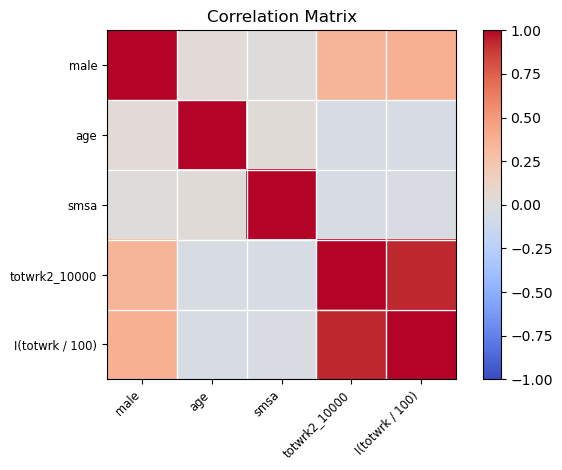

In [29]:
# Визуализация корреляций
sm.graphics.plot_corr(corr_matrix, xnames=data.columns, normcolor=True, cmap='coolwarm')
plt.show()

# 2 sleep equation #2

## 2.1 VIFs

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')

In [74]:
model = smf.ols(data = df , formula = 'sleep~totwrk+age+I(age**2)+smsa+male+south').fit()
#основная
model_1 = smf.ols(data = df , formula = 'age~totwrk+I(age**2)+smsa+male+south').fit()
model_2 = smf.ols(data = df , formula = 'I(age**2)~ totwrk+age+smsa+male+south').fit()
model_3 = smf.ols(data = df , formula = 'male~totwrk+age+I(age**2)+smsa+south').fit()
model_1.params.round(3)

Intercept      19.015
totwrk          0.000
I(age ** 2)     0.012
smsa            0.014
male           -0.011
south          -0.208
dtype: float64

In [32]:
VIF_age = 1/(1 - model_1.rsquared)
VIF_age.round(2)

65.47

In [33]:
VIF_age2 = 1/(1 - model_2.rsquared)
VIF_age2.round(2)

65.6

In [34]:
VIF_male = 1/(1 - model_3.rsquared)
VIF_male.round(2)

1.17

## 2.2 Последствия

In [75]:
models = smf.ols(data = df, formula = 'sleep~totwrk+age+I(age**2)+smsa+male+union').fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sleep   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     16.58
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           6.27e-18
Time:                        18:55:12   Log-Likelihood:                -5258.6
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     699   BIC:                         1.056e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3688.5513    218.389     16.890      0.000    3259.774    4117.329
totwrk         -0.1653      0.018     -9.105      0.000      -0.201      -0.130
age            -7.7337     11.213     -0.690      0.491     -29.749      14.281
I(age ** 2)     0.1271      0.134      0.948      0.343      -0.136       0.390
smsa          -74.5269     32.156     -2.318      0.021    -137.661     -11.392
male           86.3215     34.329      2.515      0.012      18.922     153.721
union           8.5744     38.195      0.224      0.822     -66.416      83.564
==============================================================================
Omnibus:                       65.812   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.793
Skew:                          -0.465   Prob(JB):                     3.34e-40
Kurtosis:                       5.305   Cond. No.                     3.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
models.summary(alpha=0.1).tables[1]

,coef,std err,t,P>|t|,[0.05,0.95]
Intercept,3688.5513,218.389,16.890,0.000,3328.856,4048.247
totwrk,-0.1653,0.018,-9.105,0.000,-0.195,-0.135
age,-7.7337,11.213,-0.690,0.491,-26.202,10.734
I(age ** 2),0.1271,0.134,0.948,0.343,-0.094,0.348
smsa,-74.5269,32.156,-2.318,0.021,-127.489,-21.564
male,86.3215,34.329,2.515,0.012,29.781,142.862
union,8.5744,38.195,0.224,0.822,-54.334,71.482


In [37]:
string = '''names coef std.err
Intercept 3688.5513 218.389
totwrk -0.1653 0.018
age -7.7337 11.213
I(age**2) 0.1271 0.134
smsa -74.5269 32.156 
male 86.3215 34.329 
union 8.5744 38.195'''

In [38]:
df = pd.read_csv(io.StringIO(string), sep='\s+' )
df

,names,coef,std.err
0,Intercept,3688.5513,218.389
1,totwrk,-0.1653,0.018
2,age,-7.7337,11.213
3,I(age**2),0.1271,0.134
4,smsa,-74.5269,32.156
5,male,86.3215,34.329
6,union,8.5744,38.195


In [39]:
df['t_nabl'] = df['coef']/df['std.err']
df.round(3)

,names,coef,std.err,t_nabl
0,Intercept,3688.551,218.389,16.890
1,totwrk,-0.165,0.018,-9.183
2,age,-7.734,11.213,-0.690
3,I(age**2),0.127,0.134,0.949
4,smsa,-74.527,32.156,-2.318
5,male,86.322,34.329,2.515
6,union,8.574,38.195,0.224


In [40]:
alpha = 0.1
t_crit = stats.t.ppf(1-alpha/2, 706-6-1)
t_crit.round(3)

1.647

In [41]:
df['znachimost'] = df.apply(lambda x: 'znachim' if np.abs(x['t_nabl']) > t_crit else 'ne znachim', axis=1 )
df

,names,coef,std.err,t_nabl,znachimost
0,Intercept,3688.5513,218.389,16.889822,znachim
1,totwrk,-0.1653,0.018,-9.183333,znachim
2,age,-7.7337,11.213,-0.689708,ne znachim
3,I(age**2),0.1271,0.134,0.948507,ne znachim
4,smsa,-74.5269,32.156,-2.317667,znachim
5,male,86.3215,34.329,2.514536,znachim
6,union,8.5744,38.195,0.224490,ne znachim


$$ H_0 : \beta_{age} = \beta_{age^2} = 0 $$

In [76]:
models.f_test('age = I(age ** 2) = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2.496529538584052, p=0.08310459895112667, df_denom=699, df_num=2>

In [78]:
alpha=0.1
df_denom=699
df_num=2
t_crit = stats.f.ppf(1-alpha, df_num, df_denom)
t_crit.round(2)

2.31

Вывод: т.к. $F_{nabl}>F_{crit}$ гипотезу отвергаем $=>$ коэффициенты совместно значимы

### Тестируем на мультиколлинеарность

In [50]:
VIFS = pd.DataFrame({'VIF': [variance_inflation_factor(models.model.exog, i) for i in range(int(models.df_model+1))]}, index=models.model.exog_names)
VIFS.drop(index='Intercept', inplace=True)
VIFS

,VIF
totwrk,1.195469
age,65.397082
I(age ** 2),65.561373
smsa,1.004278
male,1.171666
union,1.007332


In [51]:
data = df [['totwrk', 'age', 'smsa', 'male', 'union']].copy()
data ['I(age**2)'] = df['age']**2
corr_matrix = data.corr().round(3)
corr_matrix

,totwrk,age,smsa,male,union,I(age**2)
totwrk,1.000,-0.050,-0.038,0.376,0.002,-0.067
age,-0.050,1.000,0.025,0.032,-0.037,0.992
smsa,-0.038,0.025,1.000,0.007,-0.039,0.024
male,0.376,0.032,0.007,1.000,0.040,0.026
union,0.002,-0.037,-0.039,0.040,1.000,-0.042
I(age**2),-0.067,0.992,0.024,0.026,-0.042,1.000


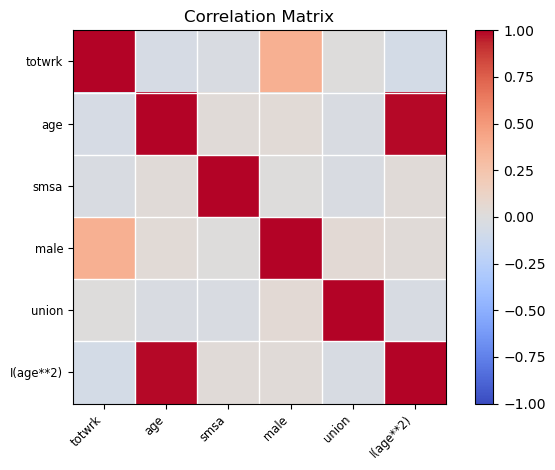

In [52]:
# Визуализация корреляций
sm.graphics.plot_corr(corr_matrix, xnames=data.columns, normcolor=True, cmap='coolwarm')
plt.show()

# 3 sleep equation #3

## 3.1 VIFs

In [101]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')

In [102]:
model = smf.ols(data = df , formula = 'sleep~totwrk+south+I(totwrk*south)+age+male+smsa').fit()
#основная
model_1 = smf.ols(data = df , formula = 'totwrk~south+I(totwrk*south)+age+male+smsa').fit()
model_2 = smf.ols(data = df , formula = 'south~totwrk+I(totwrk*south)+age+male+smsa').fit()
model_3 = smf.ols(data = df , formula = 'I(totwrk*south)~totwrk+south+age+male+smsa').fit()
model_1.params.round(3)

Intercept            1883.936
south               -1780.732
I(totwrk * south)       0.862
age                    -3.438
male                  645.996
smsa                  -46.641
dtype: float64

In [103]:
VIF_totwrk = 1/(1 - model_1.rsquared)
VIF_totwrk.round(2)

1.32

In [104]:
VIF_south = 1/(1 - model_2.rsquared)
VIF_south.round(2)

8.55

In [105]:
VIF_totwrk_south = 1/(1 - model_3.rsquared)
VIF_totwrk_south.round(2)

8.73

## 3.2 Последствия

In [81]:
models = smf.ols(data = df, formula = 'sleep~totwrk+south+I(totwrk*south)+age+male+smsa+marr').fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sleep   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     15.32
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           1.03e-18
Time:                        19:02:55   Log-Likelihood:                -5255.1
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     698   BIC:                         1.056e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3458.8111     78.683     43.959      0.000    3304.327    3613.295
totwrk               -0.1769      0.019     -9.285      0.000      -0.214      -0.139
south               -39.9825    118.087     -0.339      0.735    -271.830     191.865
I(totwrk * south)     0.0638      0.050      1.275      0.203      -0.034       0.162
age                   2.9010      1.386      2.093      0.037       0.179       5.623
male                 86.2695     34.833      2.477      0.013      17.879     154.660
smsa                -54.6473     33.074     -1.652      0.099    -119.584      10.289
marr                 29.9850     41.857      0.716      0.474     -52.196     112.166
==============================================================================
Omnibus:                       60.050   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.819
Skew:                          -0.436   Prob(JB):                     5.37e-35
Kurtosis:                       5.146   Cond. No.                     1.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
models.summary(alpha=0.05).tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3458.8111,78.683,43.959,0.000,3304.327,3613.295
totwrk,-0.1769,0.019,-9.285,0.000,-0.214,-0.139
south,-39.9825,118.087,-0.339,0.735,-271.830,191.865
I(totwrk * south),0.0638,0.050,1.275,0.203,-0.034,0.162
age,2.9010,1.386,2.093,0.037,0.179,5.623
male,86.2695,34.833,2.477,0.013,17.879,154.660
smsa,-54.6473,33.074,-1.652,0.099,-119.584,10.289
marr,29.9850,41.857,0.716,0.474,-52.196,112.166


In [61]:
string = '''names coef std.err 
Intercept 3458.8111 78.683
totwrk -0.1769 0.019 
south -39.9825 118.087
I(totwrk*south) 0.0638 0.050
age 2.9010 1.386
male 86.2695 34.833
smsa -54.6473 33.074
marr 29.9850 41.857'''

In [62]:
df = pd.read_csv(io.StringIO(string), sep='\s+' )
df

,names,coef,std.err
0,Intercept,3458.8111,78.683
1,totwrk,-0.1769,0.019
2,south,-39.9825,118.087
3,I(totwrk*south),0.0638,0.050
4,age,2.9010,1.386
5,male,86.2695,34.833
6,smsa,-54.6473,33.074
7,marr,29.9850,41.857


In [63]:
df['t_nabl'] = df['coef']/df['std.err']
df.round(3)

,names,coef,std.err,t_nabl
0,Intercept,3458.811,78.683,43.959
1,totwrk,-0.177,0.019,-9.311
2,south,-39.982,118.087,-0.339
3,I(totwrk*south),0.064,0.050,1.276
4,age,2.901,1.386,2.093
5,male,86.270,34.833,2.477
6,smsa,-54.647,33.074,-1.652
7,marr,29.985,41.857,0.716


In [64]:
alpha = 0.05
t_crit = stats.t.ppf(1-alpha/2, 706-7-1)
t_crit.round(3)

1.963

In [65]:
df['znachimost'] = df.apply(lambda x: 'znachim' if np.abs(x['t_nabl']) > t_crit else 'ne znachim', axis=1 )
df

,names,coef,std.err,t_nabl,znachimost
0,Intercept,3458.8111,78.683,43.958811,znachim
1,totwrk,-0.1769,0.019,-9.310526,znachim
2,south,-39.9825,118.087,-0.338585,ne znachim
3,I(totwrk*south),0.0638,0.050,1.276000,ne znachim
4,age,2.9010,1.386,2.093074,znachim
5,male,86.2695,34.833,2.476660,znachim
6,smsa,-54.6473,33.074,-1.652274,ne znachim
7,marr,29.9850,41.857,0.716368,ne znachim


$$ H_0 : \beta_{south} = \beta_{totwrk*south} = 0 $$

In [82]:
models.f_test('south=I(totwrk * south)=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=3.7372813139000094, p=0.02429675167584329, df_denom=698, df_num=2>

In [83]:
alpha=0.05
df_denom=698
df_num=2
t_crit = stats.f.ppf(1-alpha, df_num, df_denom)
t_crit.round(2)

3.01

Вывод: т.к. $F_{nabl}>F_{crit}$ гипотезу отвергаем $=>$ коэффициенты совместно значимы

### Тестируем на мультиколлинеарность

In [84]:
VIFS = pd.DataFrame({'VIF': [variance_inflation_factor(models.model.exog, i) for i in range(int(models.df_model+1))]}, index=models.model.exog_names)
VIFS.drop(index='Intercept', inplace=True)
VIFS

,VIF
totwrk,1.328161
south,8.553057
I(totwrk * south),8.734279
age,1.007988
male,1.216541
smsa,1.071376
marr,1.048792


In [87]:
data = df [['totwrk', 'south', 'age', 'male', 'smsa', 'marr']].copy()
data ['I(totwrk*south)'] = df['totwrk']*df['south']
corr_matrix = data.corr().round(3)
corr_matrix

,totwrk,south,age,male,smsa,marr,I(totwrk*south)
totwrk,1.000,0.051,-0.050,0.376,-0.038,-0.025,0.175
south,0.051,1.000,-0.018,-0.034,-0.238,-0.036,0.932
age,-0.050,-0.018,1.000,0.032,0.025,0.018,-0.038
male,0.376,-0.034,0.032,1.000,0.007,0.167,0.018
smsa,-0.038,-0.238,0.025,0.007,1.000,-0.081,-0.224
marr,-0.025,-0.036,0.018,0.167,-0.081,1.000,-0.038
I(totwrk*south),0.175,0.932,-0.038,0.018,-0.224,-0.038,1.000


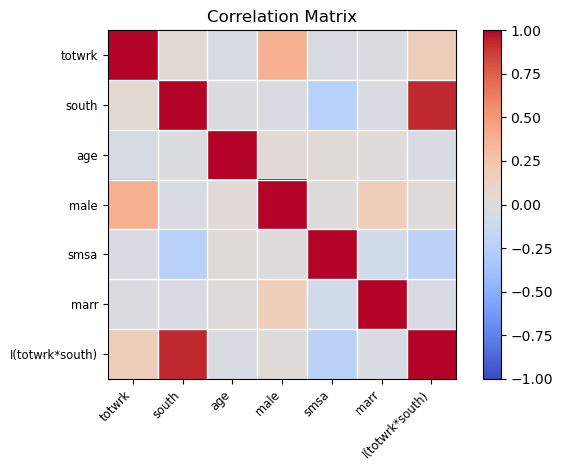

In [88]:
# Визуализация корреляций
sm.graphics.plot_corr(corr_matrix, xnames=data.columns, normcolor=True, cmap='coolwarm')
plt.show()

# 4 wage equation #1

## 4.1 VIFs

In [164]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/wage2.csv')

In [165]:
model = smf.ols(data = df , formula = 'np.log(wage)~age+I(age**2)+IQ+married+south+urban').fit()
#основная
model_1 = smf.ols(data = df , formula = 'age~I(age**2)+IQ+married+south+urban').fit()
model_2 = smf.ols(data = df , formula = 'I(age**2)~age+IQ+married+south+urban').fit()
model_3 = smf.ols(data = df , formula = 'urban~age+I(age**2)+IQ+married+south').fit()
model_1.params.round(3)

Intercept      16.514
I(age ** 2)     0.015
IQ             -0.000
married        -0.003
south           0.010
urban           0.014
dtype: float64

In [166]:
VIF_age = 1/(1 - model_1.rsquared)
VIF_age.round(2)

632.87

In [167]:
VIF_age2 = 1/(1 - model_2.rsquared)
VIF_age2.round(2)

632.96

In [168]:
VIF_urban = 1/(1 - model_3.rsquared)
VIF_urban.round(2)

1.02

## 4.2 Последствия

In [136]:
models = smf.ols(data = df, formula = 'np.log(wage)~age+I(age**2)+IQ+married+south+urban').fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     38.90
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           2.76e-42
Time:                        20:02:25   Log-Likelihood:                -412.76
No. Observations:                 935   AIC:                             839.5
Df Residuals:                     928   BIC:                             873.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.9378      1.656      1.774      0.076      -0.313       6.188
age             0.1448      0.100      1.447      0.148      -0.052       0.341
I(age ** 2)    -0.0019      0.002     -1.236      0.217      -0.005       0.001
IQ              0.0082      0.001      9.770      0.000       0.007       0.010
married         0.2015      0.040      5.008      0.000       0.123       0.281
south          -0.1003      0.027     -3.736      0.000      -0.153      -0.048
urban           0.1732      0.028      6.260      0.000       0.119       0.227
==============================================================================
Omnibus:                       45.564   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.372
Skew:                          -0.322   Prob(JB):                     3.92e-20
Kurtosis:                       4.370   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
models.summary(alpha=0.05).tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9378,1.656,1.774,0.076,-0.313,6.188
age,0.1448,0.100,1.447,0.148,-0.052,0.341
I(age ** 2),-0.0019,0.002,-1.236,0.217,-0.005,0.001
IQ,0.0082,0.001,9.770,0.000,0.007,0.010
married,0.2015,0.040,5.008,0.000,0.123,0.281
south,-0.1003,0.027,-3.736,0.000,-0.153,-0.048
urban,0.1732,0.028,6.260,0.000,0.119,0.227


In [121]:
string = '''names coef std.err
Intercept 2.9378 1.656
age 0.1448 0.100
I(age**2) -0.0019 0.002
IQ 0.0082 0.001
married 0.2015 0.040
south -0.1003 0.027
urban 0.1732 0.028'''

In [122]:
df = pd.read_csv(io.StringIO(string), sep='\s+' )
df

,names,coef,std.err
0,Intercept,2.9378,1.656
1,age,0.1448,0.100
2,I(age**2),-0.0019,0.002
3,IQ,0.0082,0.001
4,married,0.2015,0.040
5,south,-0.1003,0.027
6,urban,0.1732,0.028


In [123]:
df['t_nabl'] = df['coef']/df['std.err']
df.round(3)

,names,coef,std.err,t_nabl
0,Intercept,2.938,1.656,1.774
1,age,0.145,0.100,1.448
2,I(age**2),-0.002,0.002,-0.950
3,IQ,0.008,0.001,8.200
4,married,0.202,0.040,5.038
5,south,-0.100,0.027,-3.715
6,urban,0.173,0.028,6.186


In [124]:
alpha = 0.05
t_crit = stats.t.ppf(1-alpha/2, 935-6-1)
t_crit.round(3)

1.963

In [125]:
df['znachimost'] = df.apply(lambda x: 'znachim' if np.abs(x['t_nabl']) > t_crit else 'ne znachim', axis=1 )
df

,names,coef,std.err,t_nabl,znachimost
0,Intercept,2.9378,1.656,1.774034,ne znachim
1,age,0.1448,0.100,1.448000,ne znachim
2,I(age**2),-0.0019,0.002,-0.950000,ne znachim
3,IQ,0.0082,0.001,8.200000,znachim
4,married,0.2015,0.040,5.037500,znachim
5,south,-0.1003,0.027,-3.714815,znachim
6,urban,0.1732,0.028,6.185714,znachim


$$ H_0 : \beta_{age} = \beta_{age^2} = 0 $$

In [126]:
models.f_test('age = I(age ** 2) = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=14.832640139577867, p=4.561255706288112e-07, df_denom=928, df_num=2>

In [127]:
alpha=0.05
df_denom=928
df_num=2
t_crit = stats.f.ppf(1-alpha, df_num, df_denom)
t_crit.round(2)

3.01

Вывод: т.к. $F_{nabl}>F_{crit}$ гипотезу отвергаем $=>$ коэффициенты совместно значимы

### Тестируем на мультиколлинеарность

In [129]:
VIFS = pd.DataFrame({'VIF': [variance_inflation_factor(models.model.exog, i) for i in range(int(models.df_model+1))]}, index=models.model.exog_names)
VIFS.drop(index='Intercept', inplace=True)
VIFS

,VIF
age,632.868517
I(age ** 2),632.964483
IQ,1.049260
married,1.013807
south,1.061287
urban,1.016749


In [137]:
data = df [['age', 'IQ', 'married', 'south', 'urban']].copy()
data ['I(age**2)'] = df['age']**2
corr_matrix = data.corr().round(3)
corr_matrix

,age,IQ,married,south,urban,I(age**2)
age,1.000,-0.044,0.107,-0.029,-0.007,0.999
IQ,-0.044,1.000,-0.015,-0.210,0.039,-0.043
married,0.107,-0.015,1.000,0.023,-0.040,0.107
south,-0.029,-0.210,0.023,1.000,-0.110,-0.031
urban,-0.007,0.039,-0.040,-0.110,1.000,-0.009
I(age**2),0.999,-0.043,0.107,-0.031,-0.009,1.000


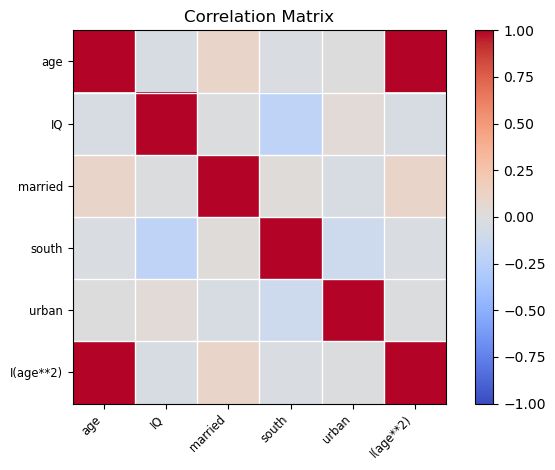

In [138]:
# Визуализация корреляций
sm.graphics.plot_corr(corr_matrix, xnames=data.columns, normcolor=True, cmap='coolwarm')
plt.show()

# 5 wage equation #2

## 5.1 VIFs

In [156]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/wage2.csv')

In [157]:
model = smf.ols(data = df , formula = 'np.log(wage)~age+urban+I(age*urban)+IQ+I(IQ*urban)').fit()
#основная
model_1 = smf.ols(data = df , formula = 'age~urban+I(age*urban)+IQ+I(IQ*urban)').fit()
model_2 = smf.ols(data = df , formula = 'urban~age+I(age*urban)+IQ+I(IQ*urban)').fit()
model_3 = smf.ols(data = df , formula = 'I(age*urban)~age+urban+IQ+I(IQ*urban)').fit()
model_1.params.round(3)

Intercept         33.242
urban            -33.242
I(age * urban)     1.000
IQ                -0.001
I(IQ * urban)      0.001
dtype: float64

In [158]:
VIF_age = 1/(1 - model_1.rsquared)
VIF_age.round(2)

3.32

In [159]:
VIF_urban = 1/(1 - model_2.rsquared)
VIF_urban.round(2)

157.08

In [160]:
VIF_age_urban = 1/(1 - model_3.rsquared)
VIF_age_urban.round(2)

112.56

## 5.2 Последствия

In [161]:
models = smf.ols(data = df, formula = 'np.log(wage)~age+IQ+south+urban+I(age*urban)+I(IQ*urban)+I(south*urban)').fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     29.42
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           8.45e-37
Time:                        20:22:07   Log-Likelihood:                -423.86
No. Observations:                 935   AIC:                             863.7
Df Residuals:                     927   BIC:                             902.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.9986      0.312     16.016      0.000       4.386       5.611
age                  0.0244      0.007      3.294      0.001       0.010       0.039
IQ                   0.0084      0.002      5.116      0.000       0.005       0.012
south               -0.0140      0.052     -0.271      0.787      -0.115       0.087
urban                0.2369      0.368      0.643      0.520      -0.486       0.960
I(age * urban)      -0.0006      0.009     -0.069      0.945      -0.018       0.017
I(IQ * urban)    -1.409e-05      0.002     -0.007      0.994      -0.004       0.004
I(south * urban)    -0.1172      0.061     -1.924      0.055      -0.237       0.002
==============================================================================
Omnibus:                       40.413   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.142
Skew:                          -0.311   Prob(JB):                     1.31e-16
Kurtosis:                       4.221   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
models.summary(alpha=0.01).tables[1]

,coef,std err,t,P>|t|,[0.005,0.995]
Intercept,4.9986,0.312,16.016,0.000,4.193,5.804
age,0.0244,0.007,3.294,0.001,0.005,0.044
IQ,0.0084,0.002,5.116,0.000,0.004,0.013
south,-0.0140,0.052,-0.271,0.787,-0.147,0.119
urban,0.2369,0.368,0.643,0.520,-0.714,1.188
I(age * urban),-0.0006,0.009,-0.069,0.945,-0.023,0.022
I(IQ * urban),-1.409e-05,0.002,-0.007,0.994,-0.005,0.005
I(south * urban),-0.1172,0.061,-1.924,0.055,-0.274,0.040


In [146]:
string = '''names coef std.err
Intercept 4.9986 0.312
age 0.0244 0.007
IQ 0.0084 0.002
south -0.0140 0.052
urban 0.2369 0.368
I(age*urban) -0.0006 0.009
I(IQ*urban) -1.409e-05 0.002
I(south*urban) -0.1172 0.061'''

In [147]:
df = pd.read_csv(io.StringIO(string), sep='\s+' )
df

,names,coef,std.err
0,Intercept,4.998600,0.312
1,age,0.024400,0.007
2,IQ,0.008400,0.002
3,south,-0.014000,0.052
4,urban,0.236900,0.368
5,I(age*urban),-0.000600,0.009
6,I(IQ*urban),-0.000014,0.002
7,I(south*urban),-0.117200,0.061


In [148]:
df['t_nabl'] = df['coef']/df['std.err']
df.round(3)

,names,coef,std.err,t_nabl
0,Intercept,4.999,0.312,16.021
1,age,0.024,0.007,3.486
2,IQ,0.008,0.002,4.200
3,south,-0.014,0.052,-0.269
4,urban,0.237,0.368,0.644
5,I(age*urban),-0.001,0.009,-0.067
6,I(IQ*urban),-0.000,0.002,-0.007
7,I(south*urban),-0.117,0.061,-1.921


In [149]:
alpha = 0.01
t_crit = stats.t.ppf(1-alpha/2, 935-7-1)
t_crit.round(3)

2.581

In [150]:
df['znachimost'] = df.apply(lambda x: 'znachim' if np.abs(x['t_nabl']) > t_crit else 'ne znachim', axis=1 )
df

,names,coef,std.err,t_nabl,znachimost
0,Intercept,4.998600,0.312,16.021154,znachim
1,age,0.024400,0.007,3.485714,znachim
2,IQ,0.008400,0.002,4.200000,znachim
3,south,-0.014000,0.052,-0.269231,ne znachim
4,urban,0.236900,0.368,0.643750,ne znachim
5,I(age*urban),-0.000600,0.009,-0.066667,ne znachim
6,I(IQ*urban),-0.000014,0.002,-0.007045,ne znachim
7,I(south*urban),-0.117200,0.061,-1.921311,ne znachim


$$ H_0 : \beta_{urban} = \beta_{age*urban} = \beta_{IQ*urban} = \beta_{south*urban} = 0 $$

In [151]:
models.f_test('urban = I(age * urban) = I(IQ * urban)= I(south * urban) = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=10.250484249105511, p=4.0029474518426535e-08, df_denom=927, df_num=4>

In [152]:
alpha=0.01
df_denom=927
df_num=4
t_crit = stats.f.ppf(1-alpha, df_num, df_denom)
t_crit.round(2)

3.34

Вывод: т.к. $F_{nabl}>F_{crit}$ гипотезу отвергаем $=>$ коэффициенты совместно значимы

### Тестируем на мультиколлинеарность

In [153]:
VIFS = pd.DataFrame({'VIF': [variance_inflation_factor(models.model.exog, i) for i in range(int(models.df_model+1))]}, index=models.model.exog_names)
VIFS.drop(index='Intercept', inplace=True)
VIFS

,VIF
age,3.394929
IQ,3.879824
south,3.832146
urban,175.876722
I(age * urban),114.318464
I(IQ * urban),53.135490
I(south * urban),4.087171


In [162]:
data = df [['age', 'IQ', 'south', 'urban']].copy()
data ['I(age*urban)'] = df['age']*df['urban']
data ['I(IQ*urban)'] = df['IQ']*df['urban']
data ['I(south*urban)'] = df['south']*df['urban']
corr_matrix = data.corr().round(3)
corr_matrix

,age,IQ,south,urban,I(age*urban),I(IQ*urban),I(south*urban)
age,1.000,-0.044,-0.029,-0.007,0.137,-0.020,0.010
IQ,-0.044,1.000,-0.210,0.039,0.030,0.260,-0.097
south,-0.029,-0.210,1.000,-0.110,-0.106,-0.136,0.741
urban,-0.007,0.039,-0.110,1.000,0.985,0.964,0.334
I(age*urban),0.137,0.030,-0.106,0.985,1.000,0.947,0.332
I(IQ*urban),-0.020,0.260,-0.136,0.964,0.947,1.000,0.288
I(south*urban),0.010,-0.097,0.741,0.334,0.332,0.288,1.000


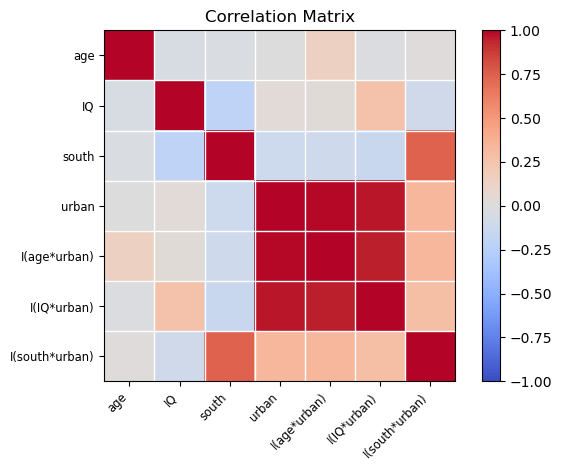

In [163]:
# Визуализация корреляций
sm.graphics.plot_corr(corr_matrix, xnames=data.columns, normcolor=True, cmap='coolwarm')
plt.show()